# Problem Statement

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office.
You must then translate those findings into actionable insights that the head of Microsoft's 
new movie studio can use to help decide what type of films to create.

# Data Sources
1. Box Office MojoLinks to an external site.
2. IMDBLinks to an external site.
3. Rotten TomatoesLinks to an external site.
4. TheMovieDBLinks to an external site.
5. The Numbers

# Objectives:
1. Explore the given data and/or find complementary data,
2. Obtain meaningful, actionable insights from it that will,
3. Help the new head of the studio decide What type of films to create?

# Questions
1. Which type of film is most rated
2. Studios producing the most films.
3. Top Studios making the highest gross income on average


In [106]:
#Load data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
dfg = pd.read_csv("zippedData/bom.movie_gross.csv")
dfb = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
dfr = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
#get data information
dfg.shape

(3387, 5)

# DATA ANALYSIS

In [3]:
#stastics for Movie gross
dfg.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [80]:

dfg.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,b'BV',415000000,652000000,2010
1,Alice in Wonderland (2010),b'BV',334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,b'WB',296000000,664300000,2010
3,Inception,b'WB',292600000,535700000,2010
4,Shrek Forever After,b'P/DW',238700000,513900000,2010
5,The Twilight Saga: Eclipse,b'Sum.',300500000,398000000,2010
6,Iron Man 2,b'Par.',312400000,311500000,2010
7,Tangled,b'BV',200800000,391000000,2010
8,Despicable Me,b'Uni.',251500000,291600000,2010
9,How to Train Your Dragon,b'P/DW',217600000,277300000,2010


# Clean Data

In [76]:
#Check data types of the columns
display(dfg.dtypes)

title             object
studio              |S80
domestic_gross     Int64
foreign_gross     object
year               int64
dtype: object

In [70]:
#convert domestic_gross column into integer
dfg['domestic_gross'] = dfg['domestic_gross'].astype("Int64")

In [75]:
dfg['studio'] = dfg['studio'].astype('|S80')

In [79]:
dfg = dfg.dropna()
dfg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,b'BV',415000000,652000000,2010
1,Alice in Wonderland (2010),b'BV',334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,b'WB',296000000,664300000,2010
3,Inception,b'WB',292600000,535700000,2010
4,Shrek Forever After,b'P/DW',238700000,513900000,2010
...,...,...,...,...,...
3275,I Still See You,b'LGF',1400,1500000,2018
3286,The Catcher Was a Spy,b'IFC',725000,229000,2018
3309,Time Freak,b'Grindstone',10000,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,b'Darin Southa',93200,5200,2018


In [81]:
dfg[dfg.isnull().any(1)]

,title,studio,domestic_gross,foreign_gross,year


In [66]:
#stastics for title bacis
dfb.info

<bound method DataFrame.info of            tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

In [6]:
#get first 10 rows of title_basics
dfb.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
#stastics for title rating
dfr.info

<bound method DataFrame.info of            tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [8]:
# first 10 rows of title_rating
dfr.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [9]:
# Data Preparation 
#Remove duplicates and null columns
display(dfg.drop_duplicates())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
# Data Preparation 
#Remove duplicates and null columns
display(dfb.drop_duplicates())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [11]:
# Data Preparation 
#Remove duplicates and null columns
display(dfr.drop_duplicates())

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
#Merge title.basics and title.ratings and get one dataframe on tconst
df_merged = pd.merge(dfb,dfr,on='tconst')


In [13]:
df_merged

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


# Data Visualization

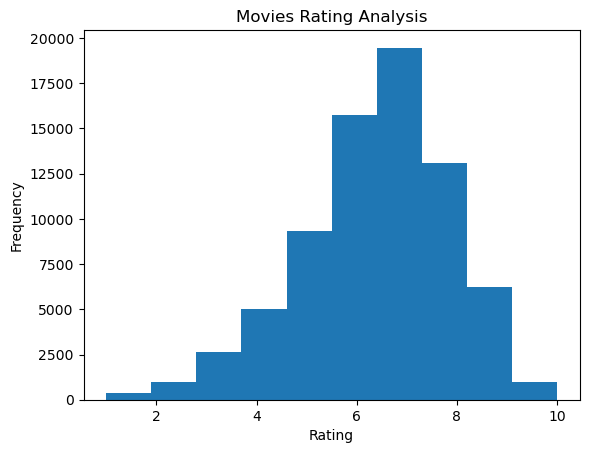

In [29]:
# Plot the data using histogram showing rating frequency
X = list(dfr.iloc[:,1]) 
plt.hist(X) 
plt.title("Movies Rating Analysis") 
plt.xlabel("Rating")
plt.ylabel("Frequency") 
  
# Show the plot 
plt.show() 

In [31]:
# merge all the datasets
df_concatenated = pd.concat([dfb, dfr,dfg], axis=1)
df_concatenated

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0,Toy Story 3,BV,415000000.0,652000000,2010.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352.0,Inception,WB,292600000.0,535700000,2010.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Remove null values
df_concatenated1 = df_concatenated.dropna()
df_concatenated1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0,Toy Story 3,BV,415000000.0,652000000,2010.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,tt1069246,6.2,326.0,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,tt10323428,Evil Lurks,Evil Lurks,2020,90.0,Horror,tt1567233,7.8,10179.0,The Front Runner,Sony,2000000.0,1200000,2018.0
3265,tt10323528,Quaffer,Quaffer,2018,88.0,Comedy,tt1569463,5.3,79.0,Wildlife,IFC,1100000.0,2000000,2018.0
3268,tt10323726,Mental Instabilities,Mental Instabilities,2019,57.0,Animation,tt1576452,6.7,250.0,Billionaire Boy's Club,VE,1300.0,2500000,2018.0
3271,tt10324026,La casa dei bambini,La casa dei bambini,2019,70.0,"Documentary,History",tt1582560,5.4,356.0,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018.0


In [54]:
# Create the top_10_generes pandas series
by_genres = df_concatenated1.genres.value_counts()
by_genres = by_genres[:10]
by_genres

Documentary             314
Drama                   177
Comedy                   63
Comedy,Drama             42
Horror                   35
Thriller                 26
Action                   20
Drama,Romance            19
Comedy,Drama,Romance     17
Horror,Thriller          16
Name: genres, dtype: int64

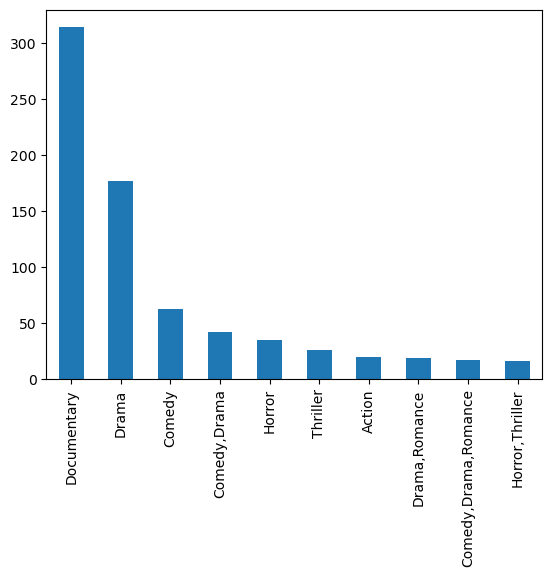

In [55]:
# Plot bar chart of genres frequency
by_genres.plot(kind='bar'); 

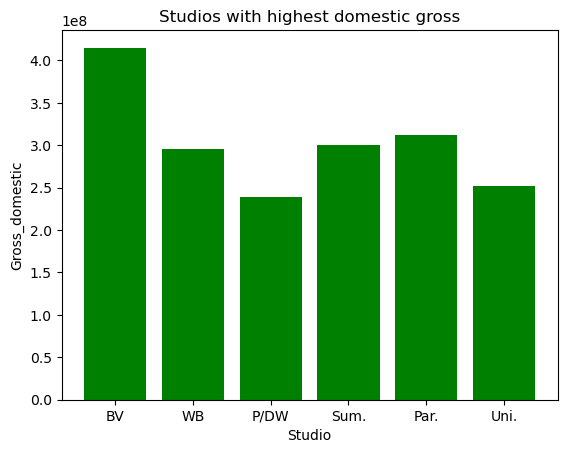

In [108]:
# Top 10 Studio with highest domestic gross
X = dfg["studio"][:10]
Y = dfg["domestic_gross"][:10]
# Plot the data using bar() method 
plt.bar(X, Y, color='g') 
plt.title("Studios with highest domestic gross") 
plt.xlabel("Studio") 
plt.ylabel("Gross_domestic") 
  
# Show the plot 
plt.show() 


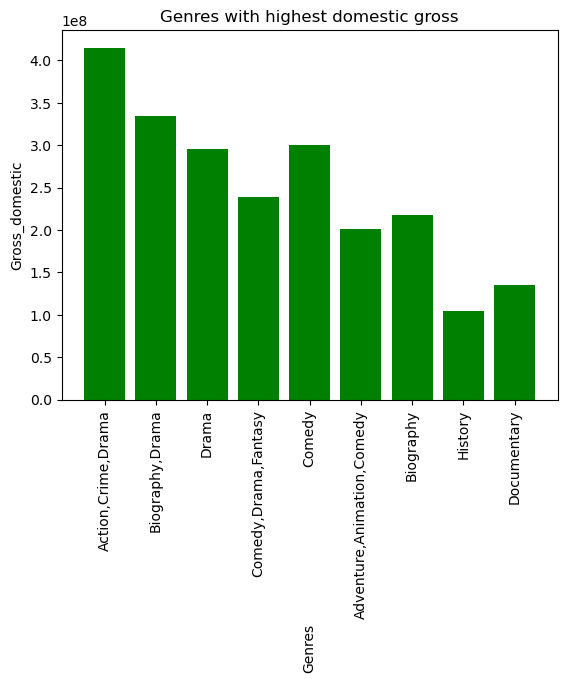

In [104]:
# Top 10 genres with highest domestic gross
X = df_concatenated1["genres"][:10]
Y = df_concatenated1["domestic_gross"][:10]
# Plot the data using bar() method 
plt.bar(X, Y, color='g') 
plt.title("Genres with highest domestic gross") 
plt.xlabel("Genres",rotation='vertical') 
plt.xticks(rotation = 90)
plt.ylabel("Gross_domestic") 
  
# Show the plot 
plt.show() 

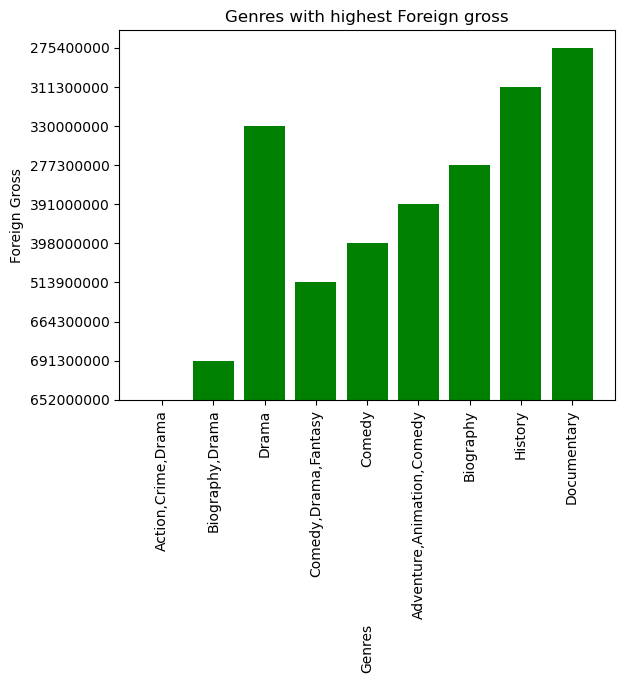

In [105]:
# Top 10 genres with highest foreign gross
X = df_concatenated1["genres"][:10]
Y = df_concatenated1["foreign_gross"][:10]
# Plot the data using bar() method 
plt.bar(X, Y, color='g') 
plt.title("Genres with highest Foreign gross") 
plt.xlabel("Genres",rotation='vertical') 
plt.xticks(rotation = 90)
plt.ylabel("Foreign Gross") 
  
# Show the plot 
plt.show() 